****
# Introduction and Goal
****

*Author: Samanyu*

*Language: Python*

*Accelerator: GPU T4 x2*

**Goal: Predict the price of backpacks given various attributes**

****
# Reading and displaying the Data
****

In [1]:
# importing
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s5e2/train.csv") # original training data
train1= pd.read_csv("/kaggle/input/playground-series-s5e2/training_extra.csv") # extra training data
df= pd.concat([train,train1],axis=0,ignore_index=True) # merging both

te=pd.read_csv(r'/kaggle/input/playground-series-s5e2/test.csv') # testing data

print("Final Train shape: ",df.shape,"\nTesting shape: ",te.shape)

Final Train shape:  (3994318, 11) 
Testing shape:  (200000, 10)


****
# Data Preprocessing
****

In [3]:
# importing
import seaborn as sns
import matplotlib.pyplot as plt
#from cuml.preprocessing import TargetEncoder

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994318 entries, 0 to 3994317
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Brand                 object 
 2   Material              object 
 3   Size                  object 
 4   Compartments          float64
 5   Laptop Compartment    object 
 6   Waterproof            object 
 7   Style                 object 
 8   Color                 object 
 9   Weight Capacity (kg)  float64
 10  Price                 float64
dtypes: float64(3), int64(1), object(7)
memory usage: 335.2+ MB


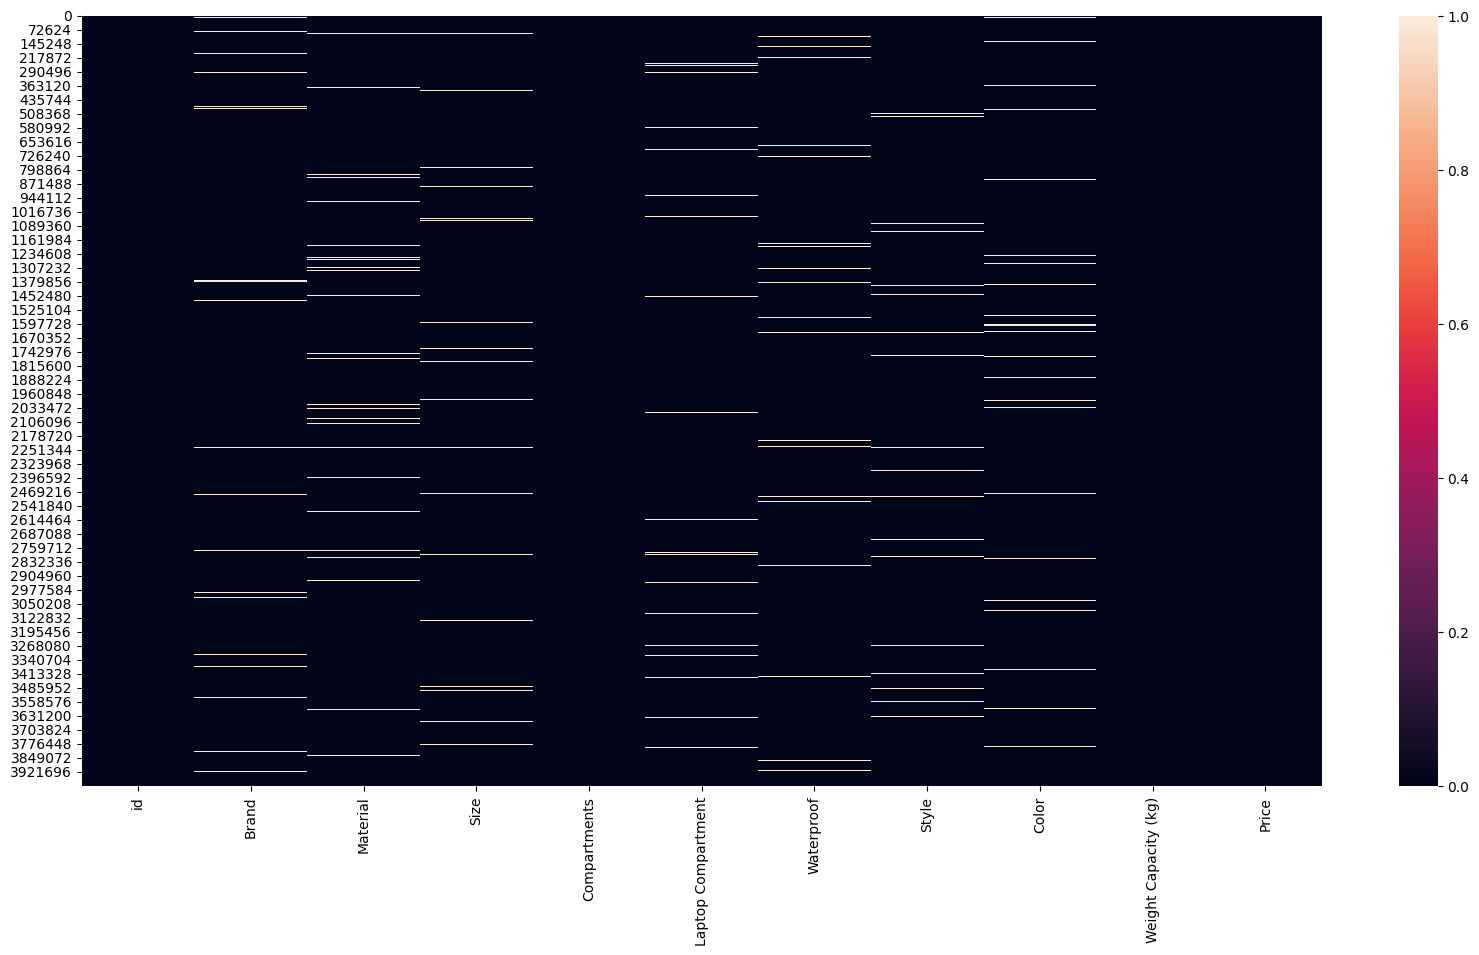

In [5]:
# Let us first look at the null values and visualize them using a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())
plt.show()

In [6]:
cols=[col for col in df.columns if df[col].isnull().any()]
for col in cols:
    print(col,'->',df[col].dtypes)

Brand -> object
Material -> object
Size -> object
Laptop Compartment -> object
Waterproof -> object
Style -> object
Color -> object
Weight Capacity (kg) -> float64


In [7]:
# Let us fill all the categorical features null values with None
# Let us fill the null value of the reamaining with its median
cols=[col for col in df.columns if df[col].isnull().any()]
for col in cols:
    if df[col].dtype=='object':
        df[col]=df[col].fillna('None')
df['Weight Capacity (kg)']=df['Weight Capacity (kg)'].fillna(df['Weight Capacity (kg)'].median())

In [8]:
# Let us drop duplicates and then drop the id column
df.drop_duplicates(inplace=True,keep='first')
df.drop(columns='id',inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994318 entries, 0 to 3994317
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Brand                 object 
 1   Material              object 
 2   Size                  object 
 3   Compartments          float64
 4   Laptop Compartment    object 
 5   Waterproof            object 
 6   Style                 object 
 7   Color                 object 
 8   Weight Capacity (kg)  float64
 9   Price                 float64
dtypes: float64(3), object(7)
memory usage: 304.7+ MB


In [10]:
# We will use Target Encoder to encode the categorical columns, let us do that after we clean our test data and visualize the data

cols=[col for col in te.columns if te[col].isnull().any()]
for col in cols:
    if te[col].dtype=='object':
        te[col]=te[col].fillna('None')
te['Weight Capacity (kg)'] = te['Weight Capacity (kg)'].fillna(te['Weight Capacity (kg)'].median())
tte=te.copy()
te.drop(columns='id',inplace=True)

****
# Data Visualization 
****

In [11]:
# This section will only show a small part of the visualization
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994318 entries, 0 to 3994317
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Brand                 object 
 1   Material              object 
 2   Size                  object 
 3   Compartments          float64
 4   Laptop Compartment    object 
 5   Waterproof            object 
 6   Style                 object 
 7   Color                 object 
 8   Weight Capacity (kg)  float64
 9   Price                 float64
dtypes: float64(3), object(7)
memory usage: 304.7+ MB


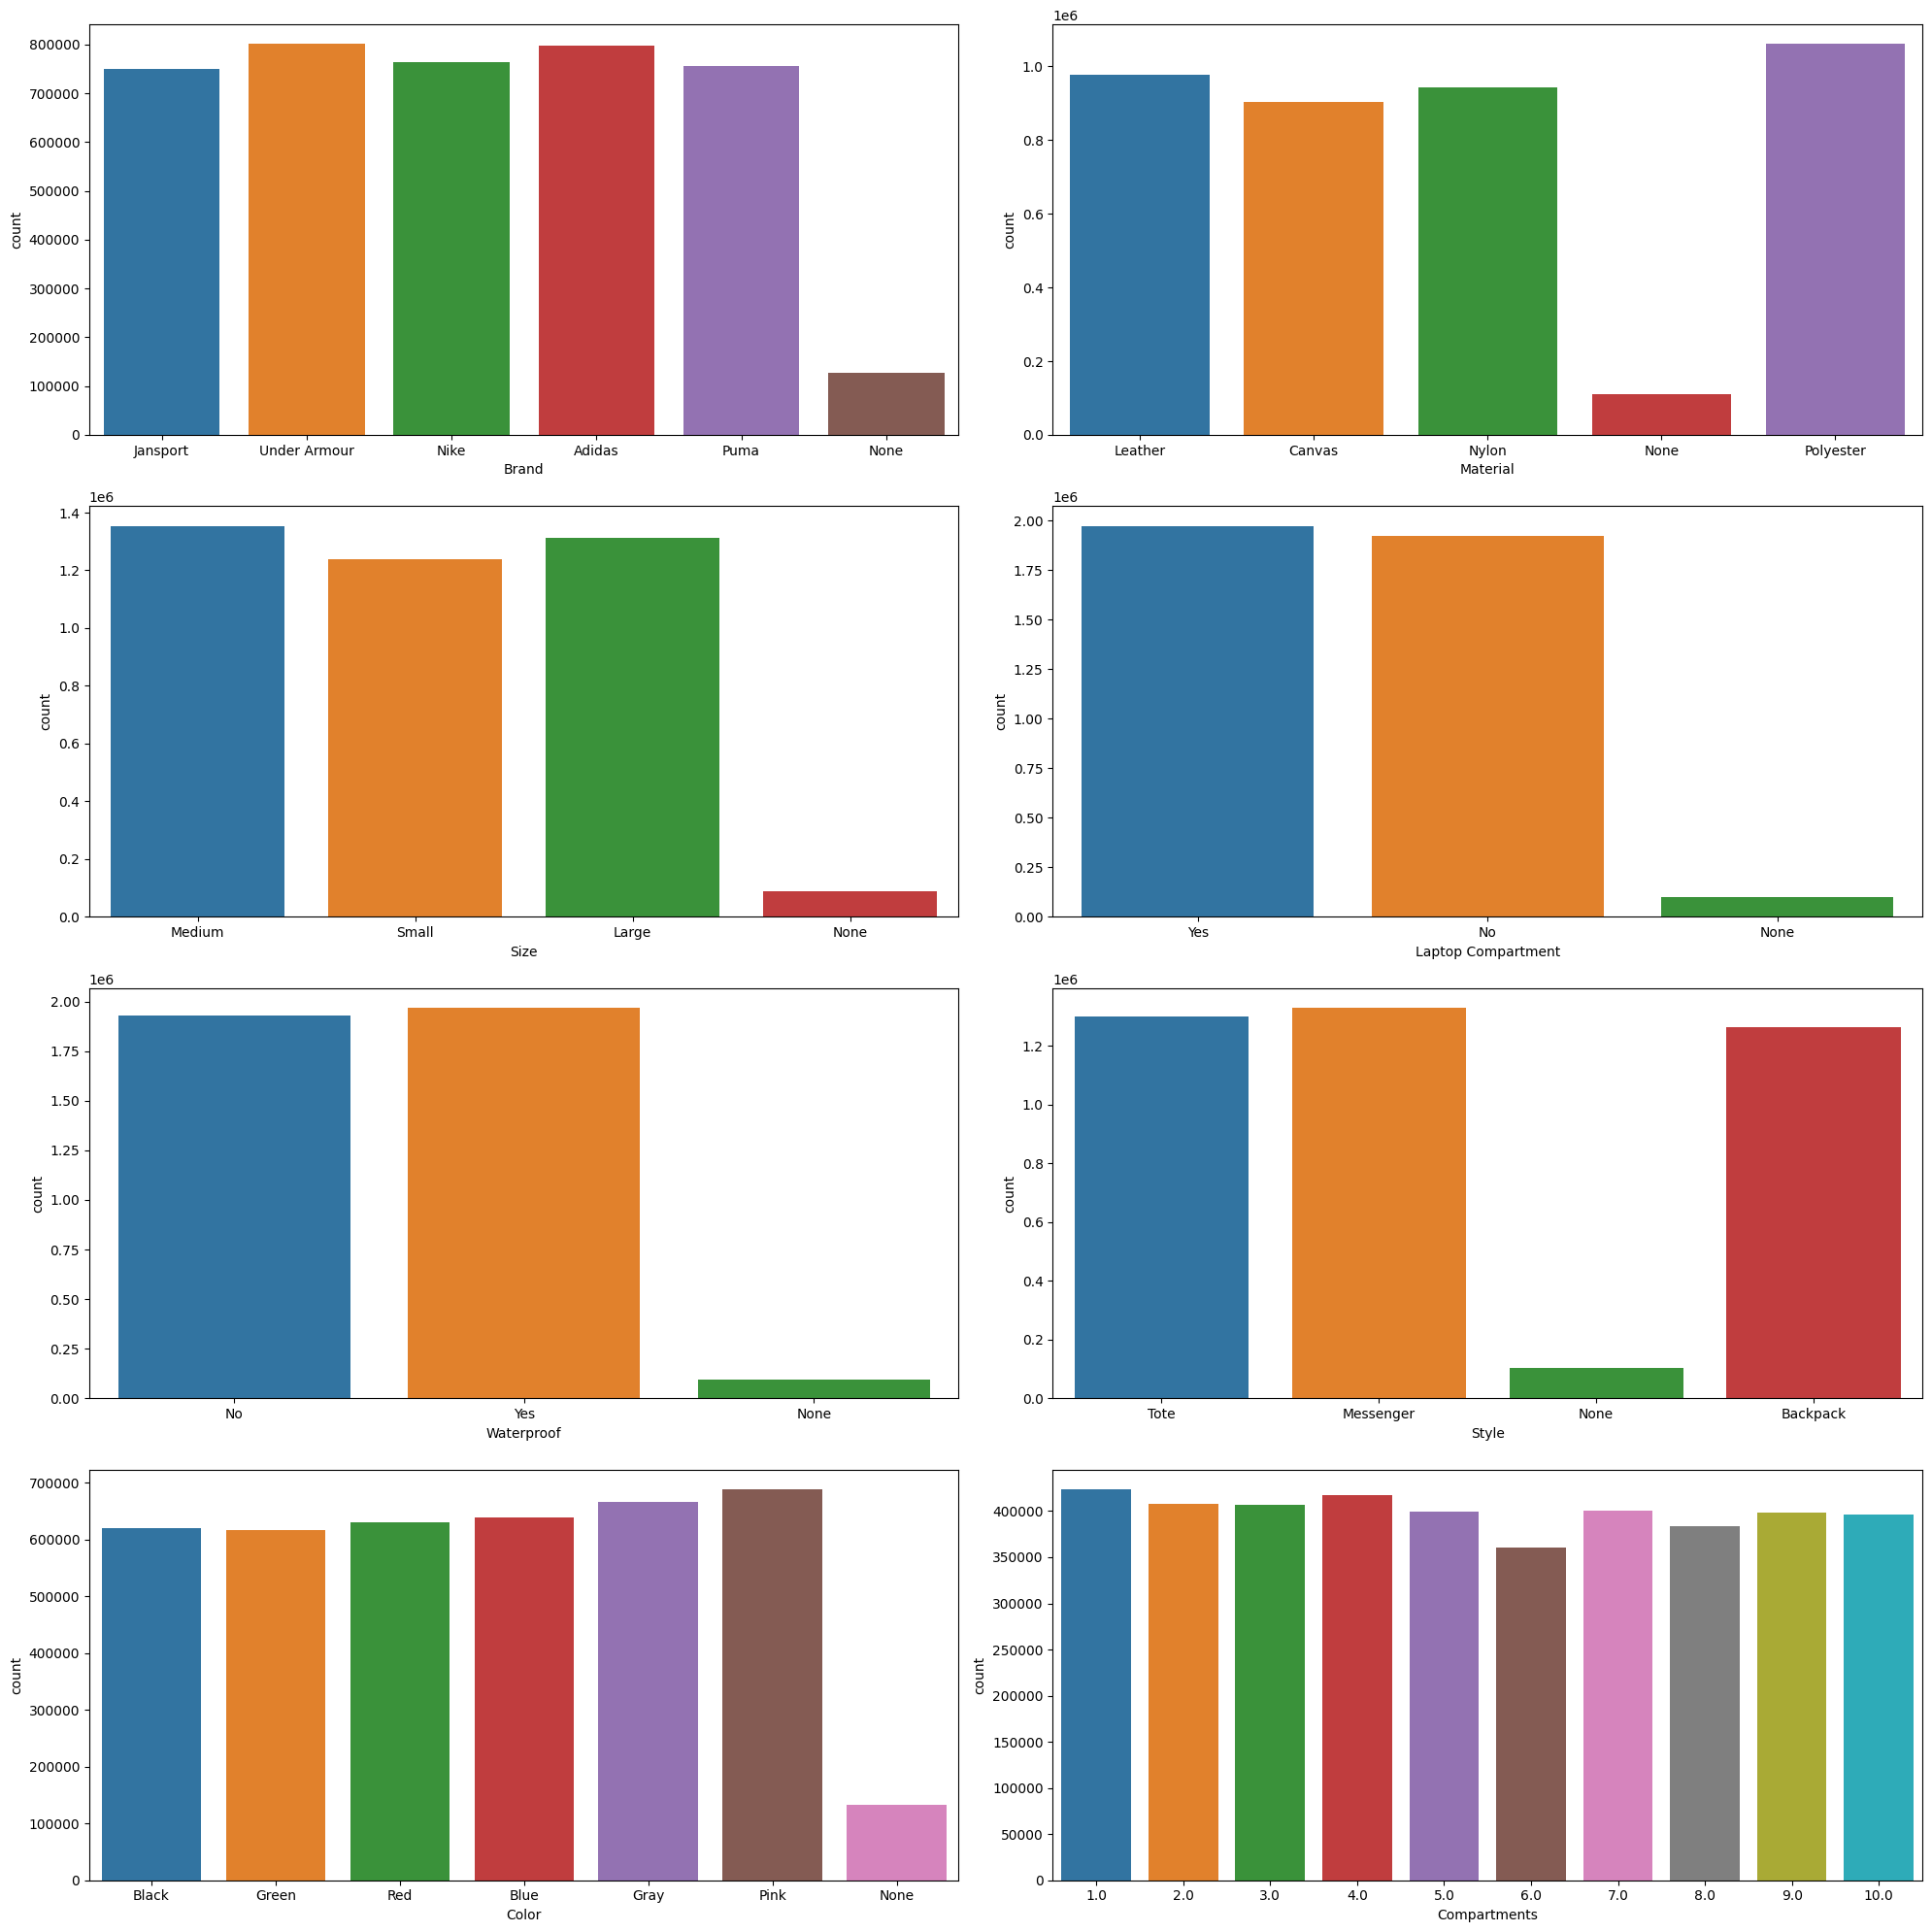

In [12]:
# Let us view the distributions of the categorical features with the help of a countplot
fig,ax=plt.subplots(4,2,figsize=(20,20))
ax=ax.flatten()
i=0
for col in df.columns[df.dtypes=='object']:
    sns.countplot(data=df,x=col,ax=ax[i])
    i+=1
sns.countplot(data=df,x='Compartments',ax=ax[i])
plt.tight_layout()
plt.show()

Based on the visualizations:

1. Brand Popularity: Under Armour appears to be the most popular brand, followed by Adidas and Nike. Jansport and Puma have slightly lower counts. This indicates a preference toward certain brands.
2. Material Preference: Polyester is the most commonly used material, followed by Leather and Nylon. Canvas is the least preferred. This suggests that durability, weight, or cost may play a role in material choices.
3. Size Distribution: Medium-sized backpacks are the most common, followed by Large and then Small. This could indicate that consumers prefer backpacks that balance capacity and portability.
4. Laptop Compartment Presence: A significant number of backpacks have a laptop compartment, but there is still a large proportion without one. This suggests that while many people need laptop compatibility, a considerable segment prefers standard backpacks.
5. Waterproof Feature: There is a slightly higher preference for waterproof backpacks compared to non-waterproof ones. This suggests that users prioritize durability and protection against weather conditions.
6. Style Distribution: Messenger-style bags are the most common, followed by tote bags and backpacks. This indicates a significant demand for messenger bags, potentially due to their versatility for work and casual use.
7. Color Popularity: Pink appears to be the most popular backpack color, while other colors like black, green, red, blue, and gray have relatively balanced distributions. This suggests that brighter colors might have a slight preference among consumers.
8. Number of Compartments: The distribution of compartments is fairly uniform, with no significant peaks. This indicates that backpacks are designed with varying compartment numbers to cater to different user needs, rather than a single dominant preference.

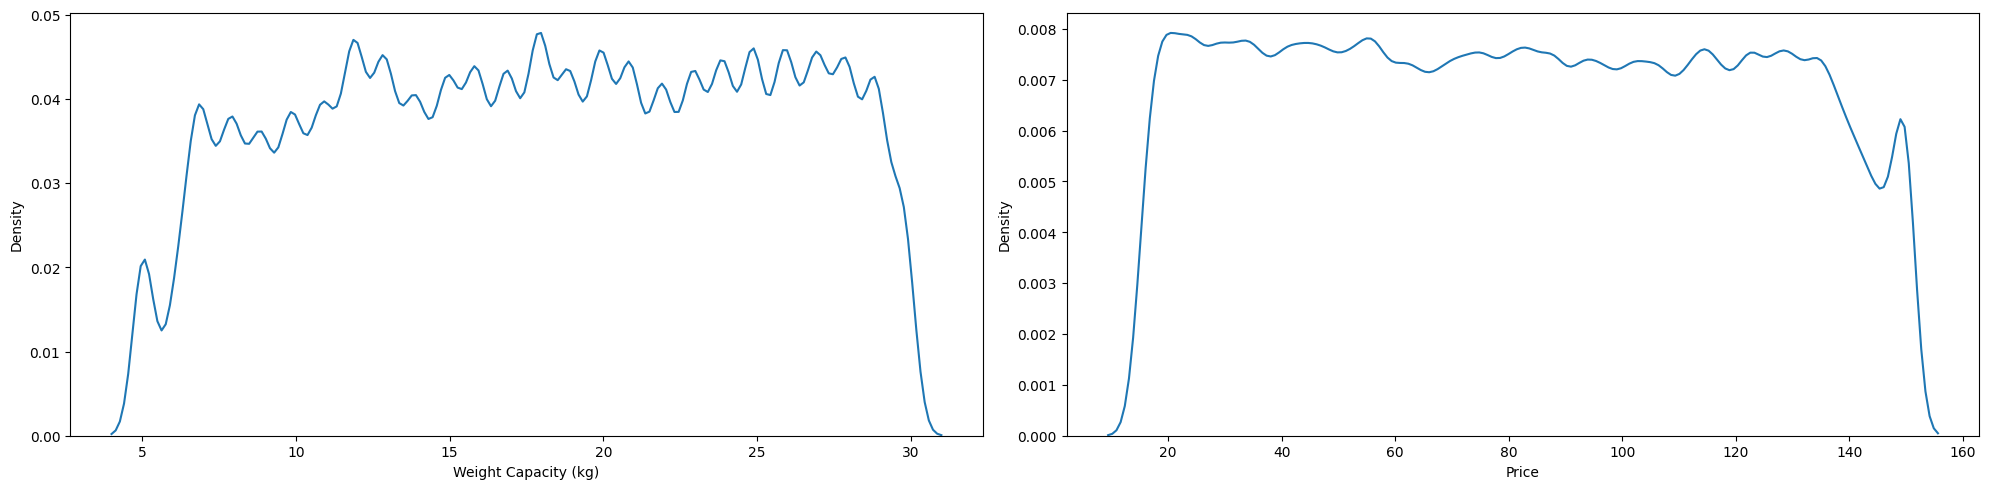

In [13]:
# Let us plot Weight Capacity and our Target Variable Price using a kdeplot
fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.kdeplot(data=df,x='Weight Capacity (kg)',ax=ax[0])
sns.kdeplot(data=df,x='Price',ax=ax[1])
plt.tight_layout()
plt.show()

Conclusions:

1. Weight Capacity Distribution (Left Plot)


* The density curve suggests that most backpacks have a weight capacity in the range of 10 to 30 kg.
* The density drops sharply beyond 30 kg, indicating that very high-capacity backpacks are uncommon.


2. Price Distribution (Right Plot)


* The price distribution is relatively flat between 20 and 140, meaning that most backpacks fall within this price range with no strong peaks.
* There is a sharp decline beyond 140, suggesting that expensive backpacks are less frequent.
* A small rise around $150 could indicate a niche category of premium backpacks.


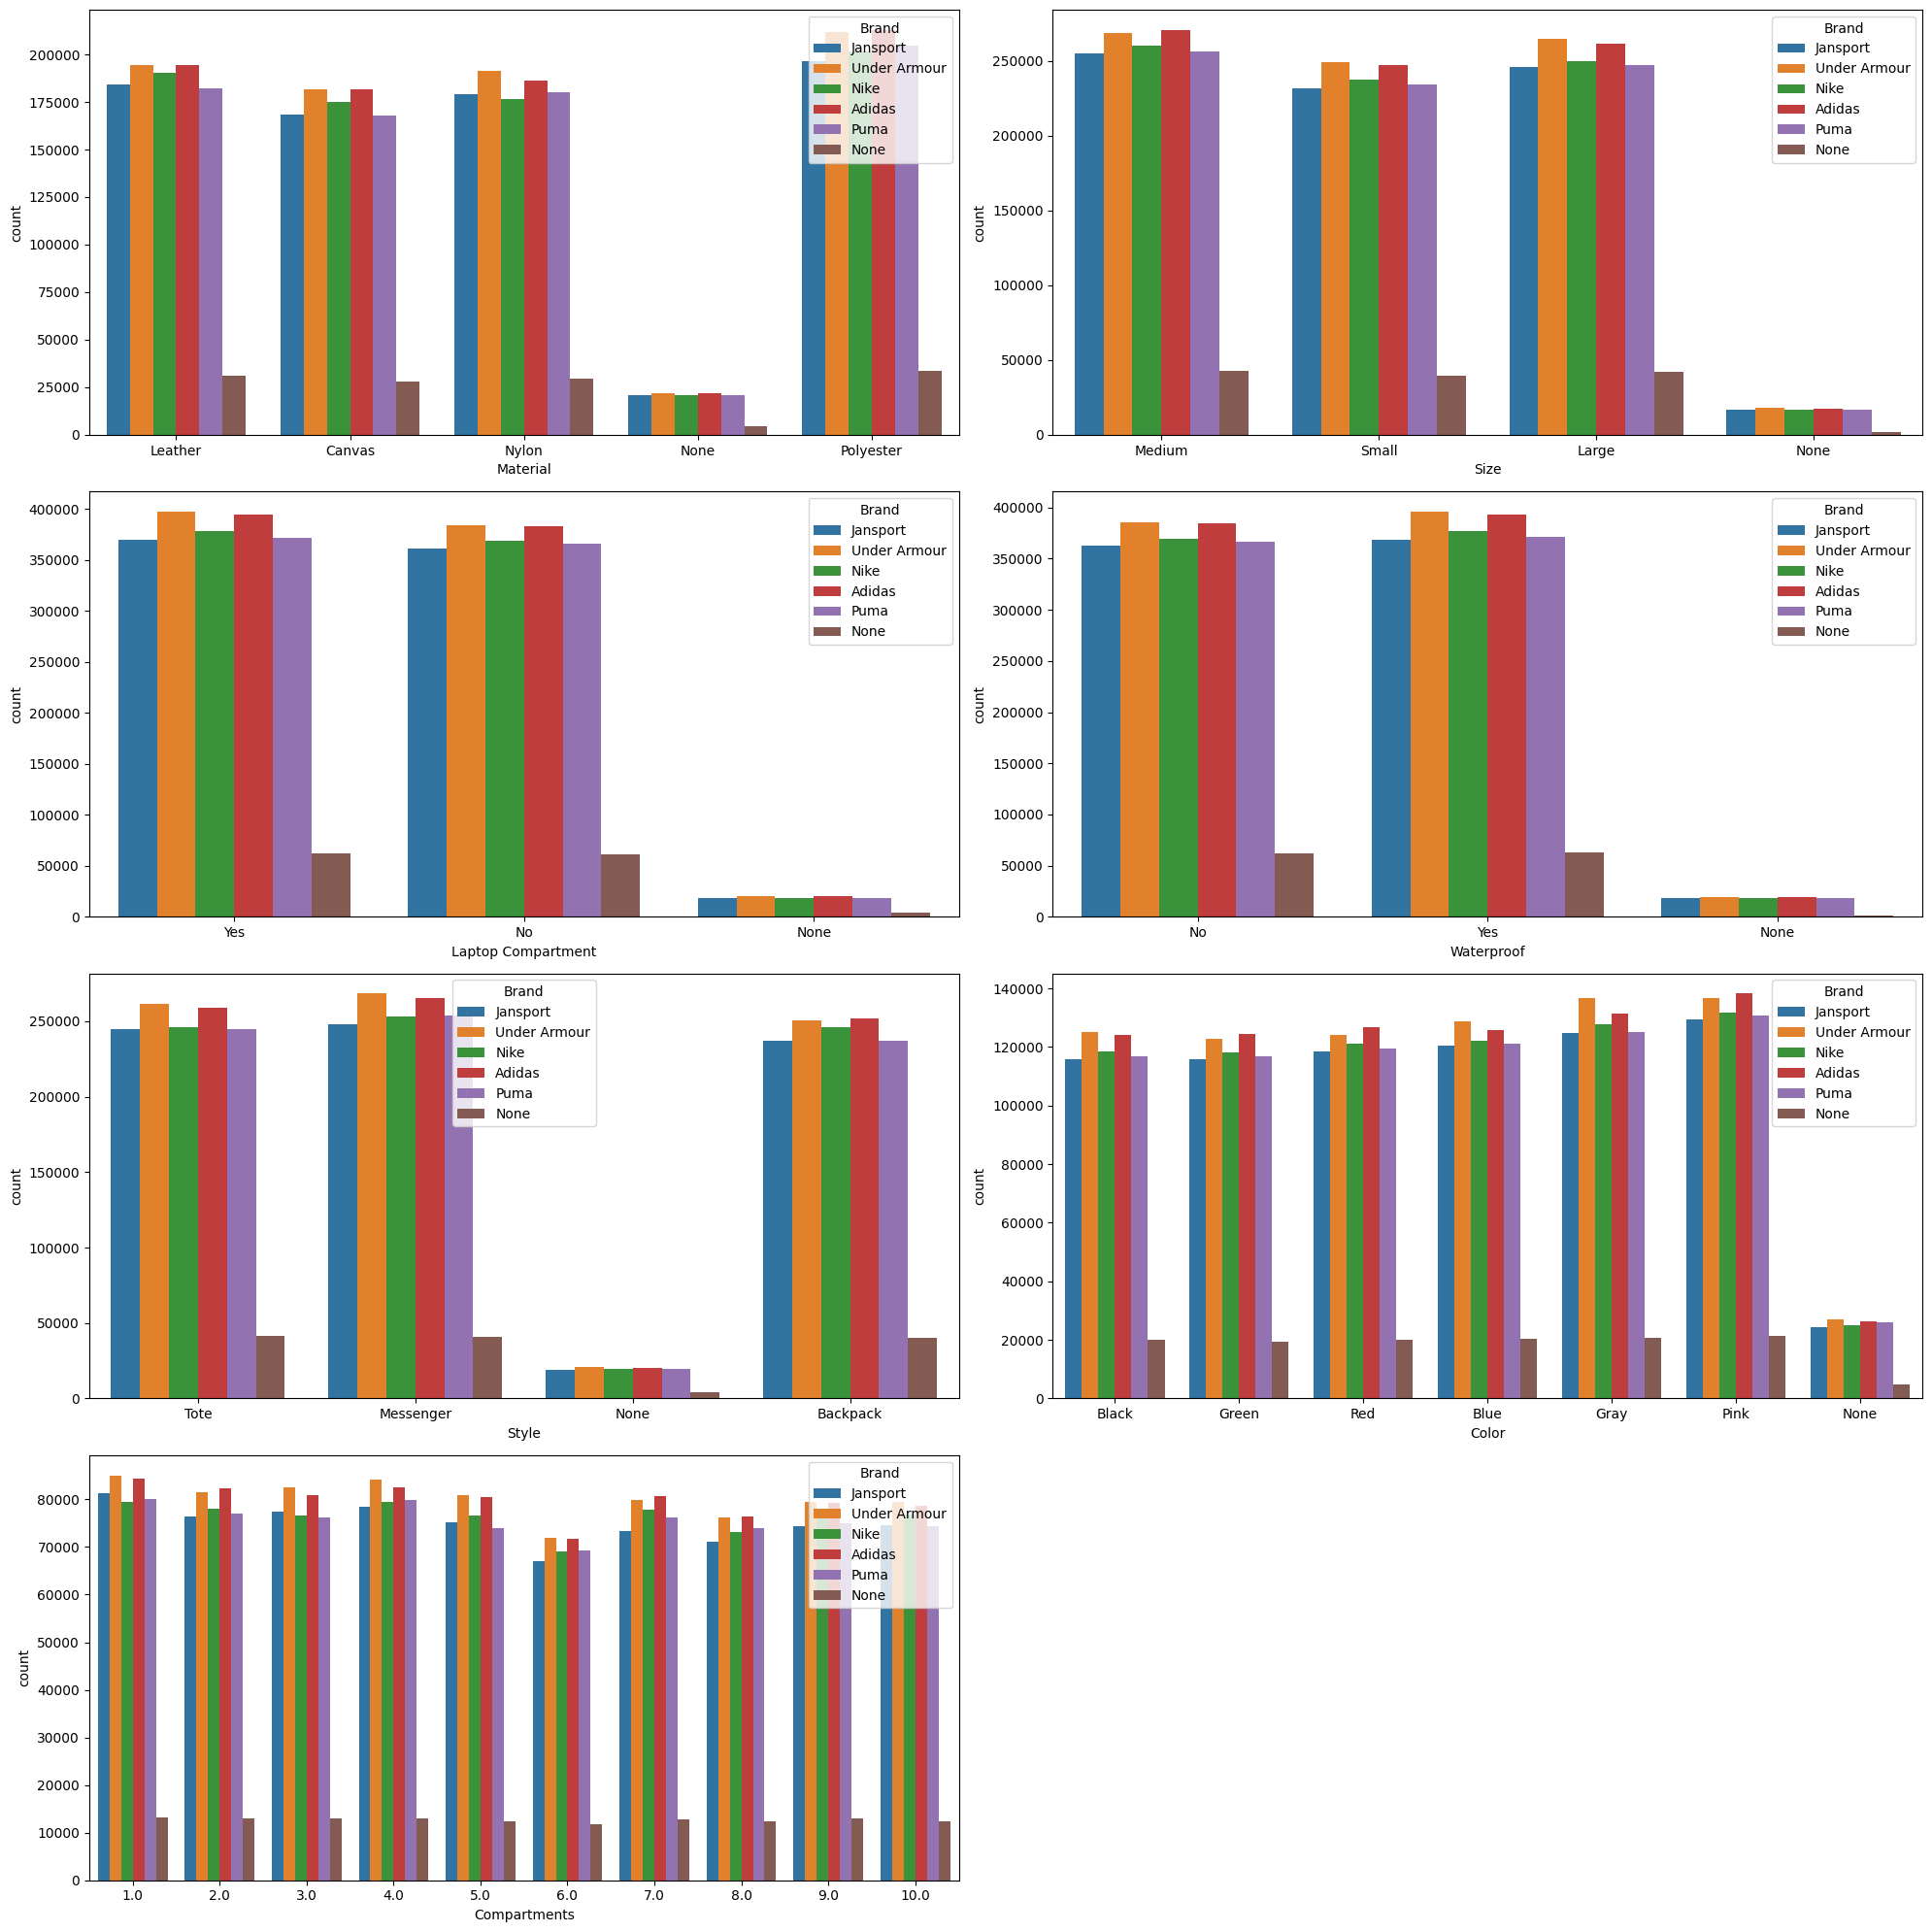

In [14]:
# Let us look at each of our brands and what it is made up of 
# We will plot the same bar plot as above but differentiate it based on brands (Hue-> Brand)
# We will then plot two more box plots to 

fig,ax=plt.subplots(4,2,figsize=(20,20))
ax=ax.flatten()
i=0
for col in df.columns[df.dtypes=='object']:
    if col !='Brand':
        sns.countplot(data=df,x=col,ax=ax[i],hue='Brand')
        i+=1
sns.countplot(data=df,x='Compartments',ax=ax[i],hue='Brand')
ax[7].axis('off')
plt.tight_layout()
plt.show()


**Findings:**


1. Material Preference by Brand

* Polyester is the most popular material across all brands, with Under Armour leading in sales.
* Nylon has the least number of products across brands.
* Leather, Canvas, and Nylon have similar distributions across brands.


2. Size Distribution by Brand 

* Medium-sized backpacks are the most common across all brands, especially for Under Armour.
* Small and large backpacks have a fairly even distribution across brands, with Adidas and Puma showing similar counts.

3. Laptop Compartment Preference 

* Backpacks with laptop compartments are slightly more popular than those without.
* Under Armour has the highest count of laptop compartment backpacks.
* Other brands, including Jansport, Nike, Adidas, and Puma, have comparable distributions.

4. Waterproof Feature Distribution 

* Waterproof backpacks are slightly more popular than non-waterproof ones.
* Under Armour has the highest number of waterproof backpacks, which aligns with its strong presence in sports and outdoor gear.
* Other brands have a nearly equal split between waterproof and non-waterproof models.

5. Style Preference by Brand 

* Messenger bags are the most popular, with Under Armour leading in sales.
* Tote bags have a lower count compared to backpacks and messenger bags.
* Backpacks have a balanced distribution across all brands, indicating that they are a staple product.

6. Color Distribution by Brand 

* Pink-colored backpacks are the most popular, especially for Under Armour.
* Gray and Blue are also well-represented, particularly for Adidas and Puma.
* Black has the lowest count across all brands, which is surprising since black is typically a common color for backpacks.

7. Number of Compartments

* Backpacks with 1 to 10 compartments show a consistent pattern across brands.
* Under Armour consistently has a higher count across all compartment ranges.
* Jansport, Nike, Adidas, and Puma maintain a similar distribution.




**Insights:**

* Under Armour dominates in almost all categories
* Nike, Adidas, and Puma have very similar product distributions, suggesting they are closely competing.
* Jansport appears to have a strong but balanced distribution, possibly targeting general consumers rather than niche markets.
* Jansport, Nike, Adidas, and Puma have a more evenly distributed market presence.
* Pink is unexpectedly the most popular color, while black is less dominant.


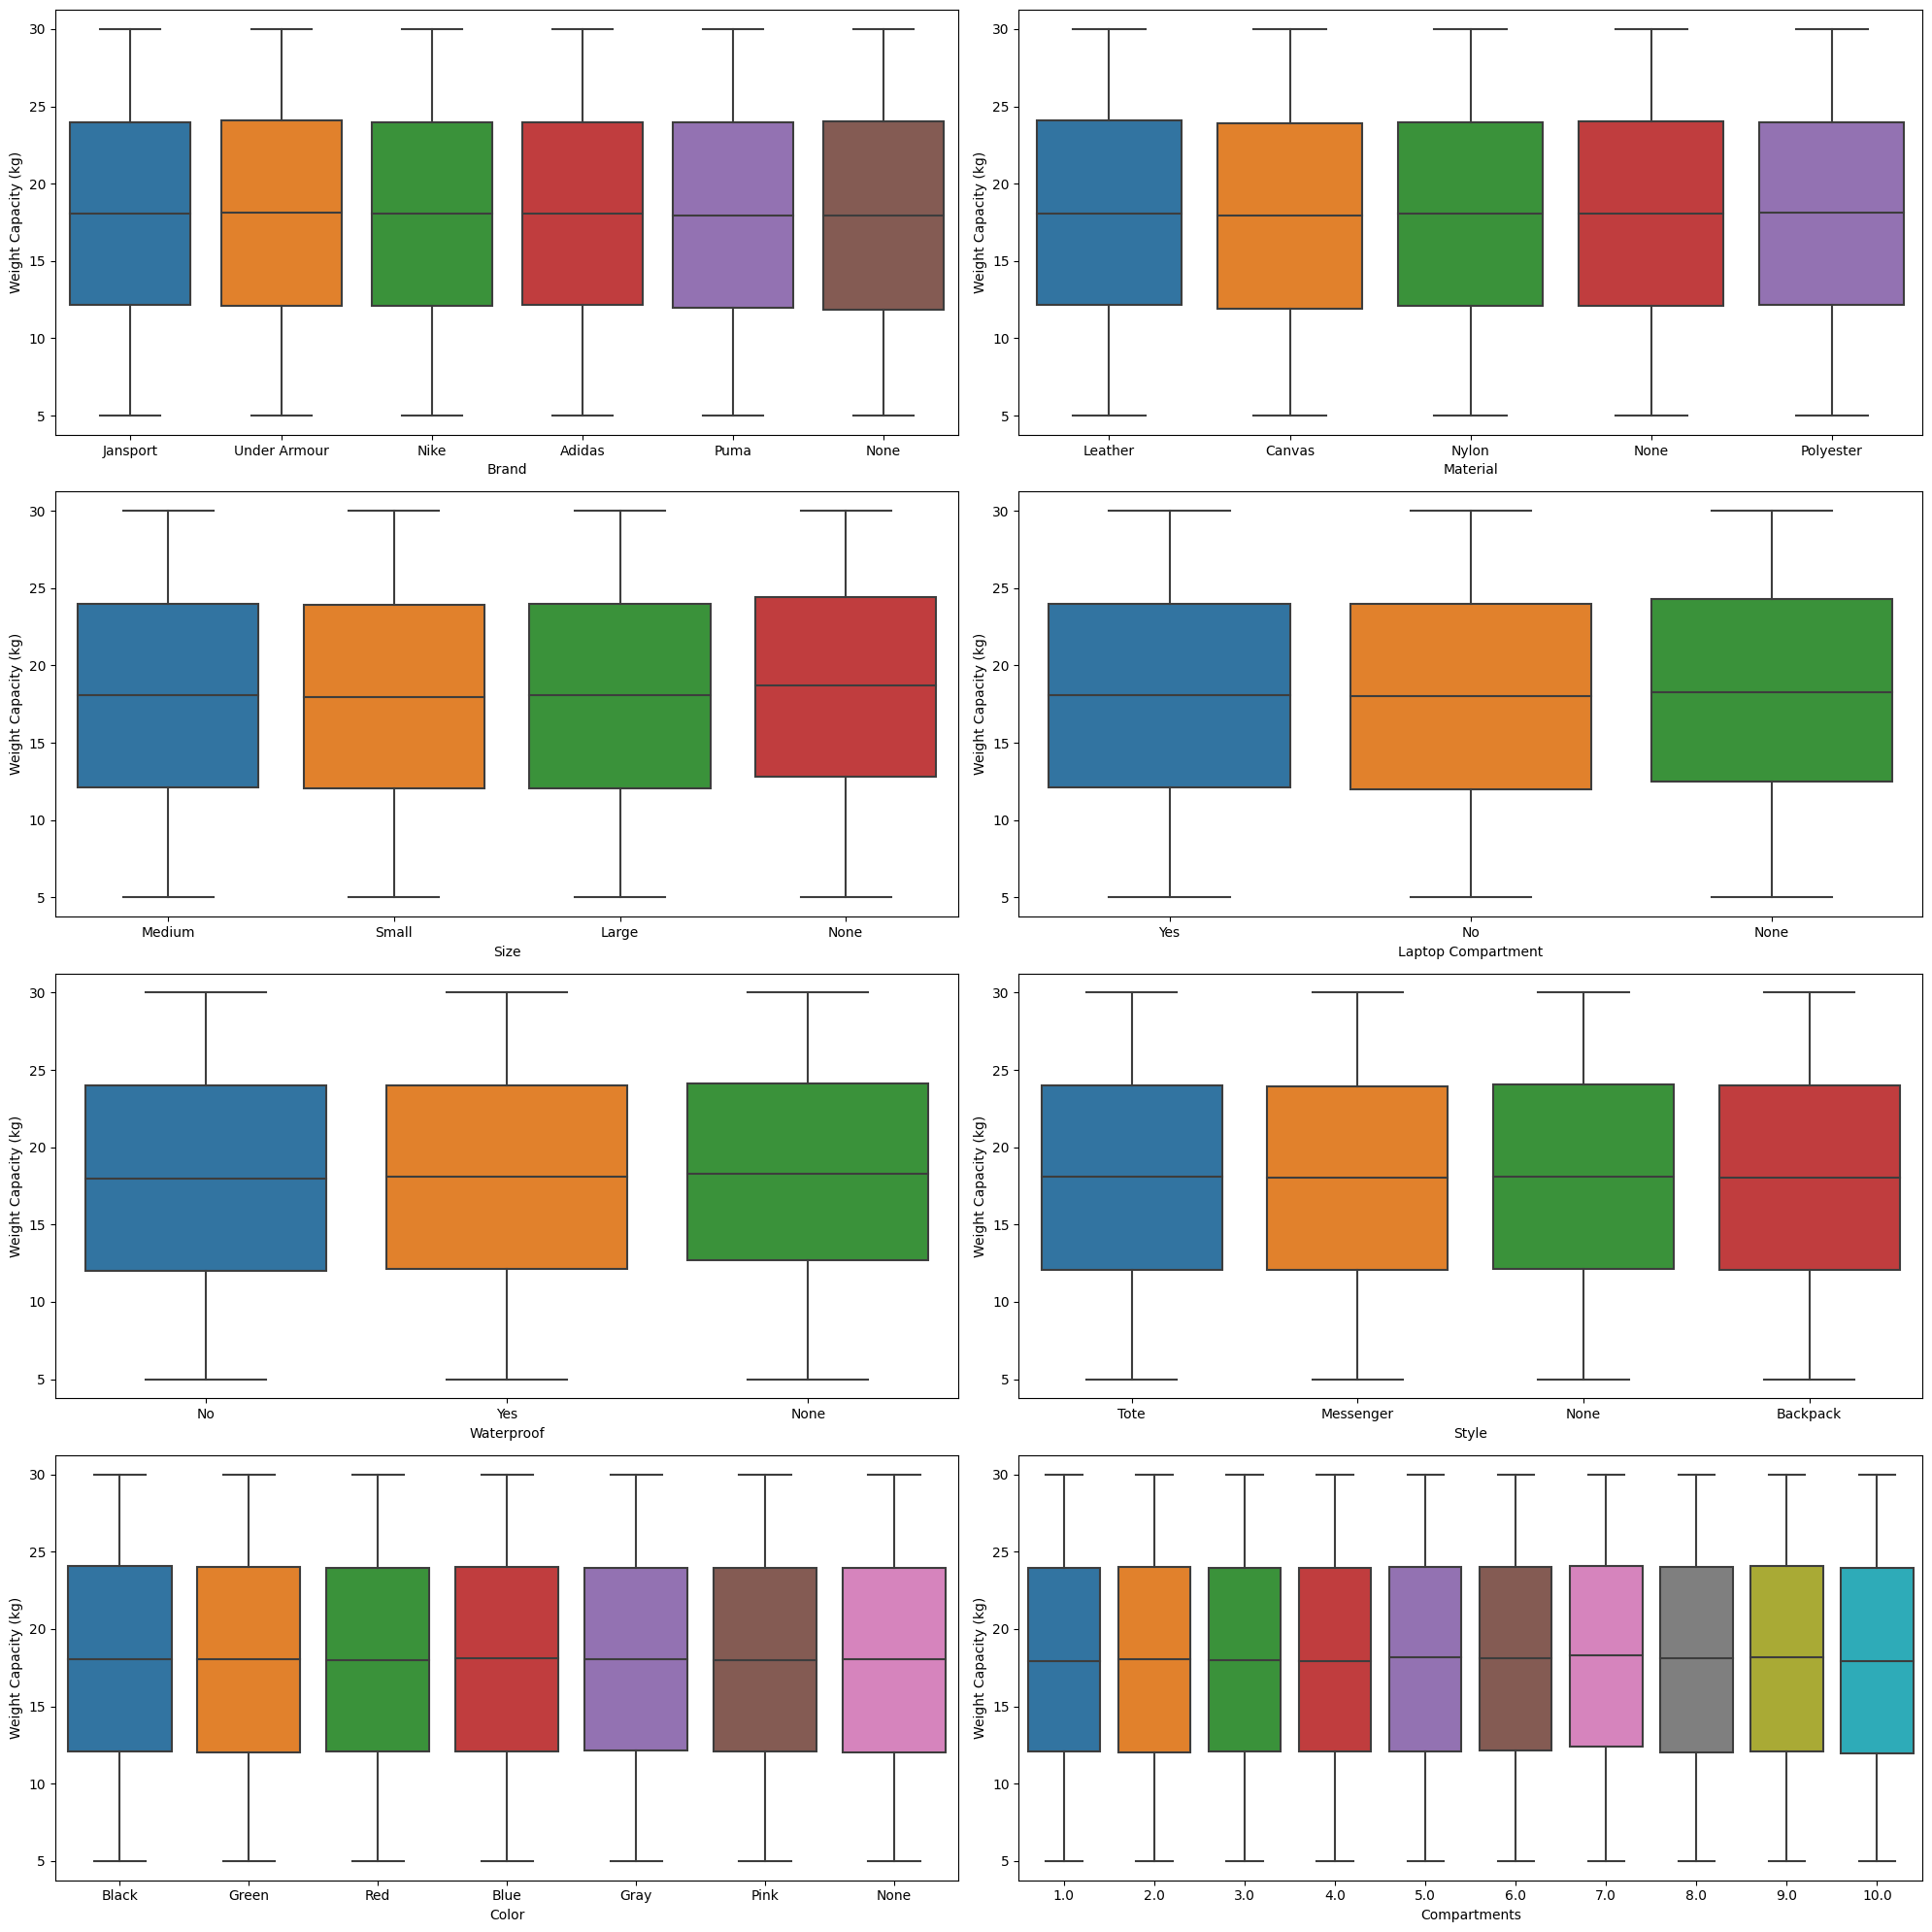

In [15]:
fig,ax=plt.subplots(4,2,figsize=(20,20))
ax=ax.flatten()
i=0
for col in df.columns[df.dtypes=='object']:
    sns.boxplot(data=df,y='Weight Capacity (kg)',ax=ax[i],x=col)
    i+=1
sns.boxplot(data=df,y='Weight Capacity (kg)',ax=ax[i],x='Compartments')
plt.tight_layout()
plt.show()

**All backpacks, regardless of brand, material, size, laptop compartment etc have a similar weight capacity range (5–30 kg, median ~17-18 kg). This suggests that durability and load-bearing ability are consistent across all categories.**

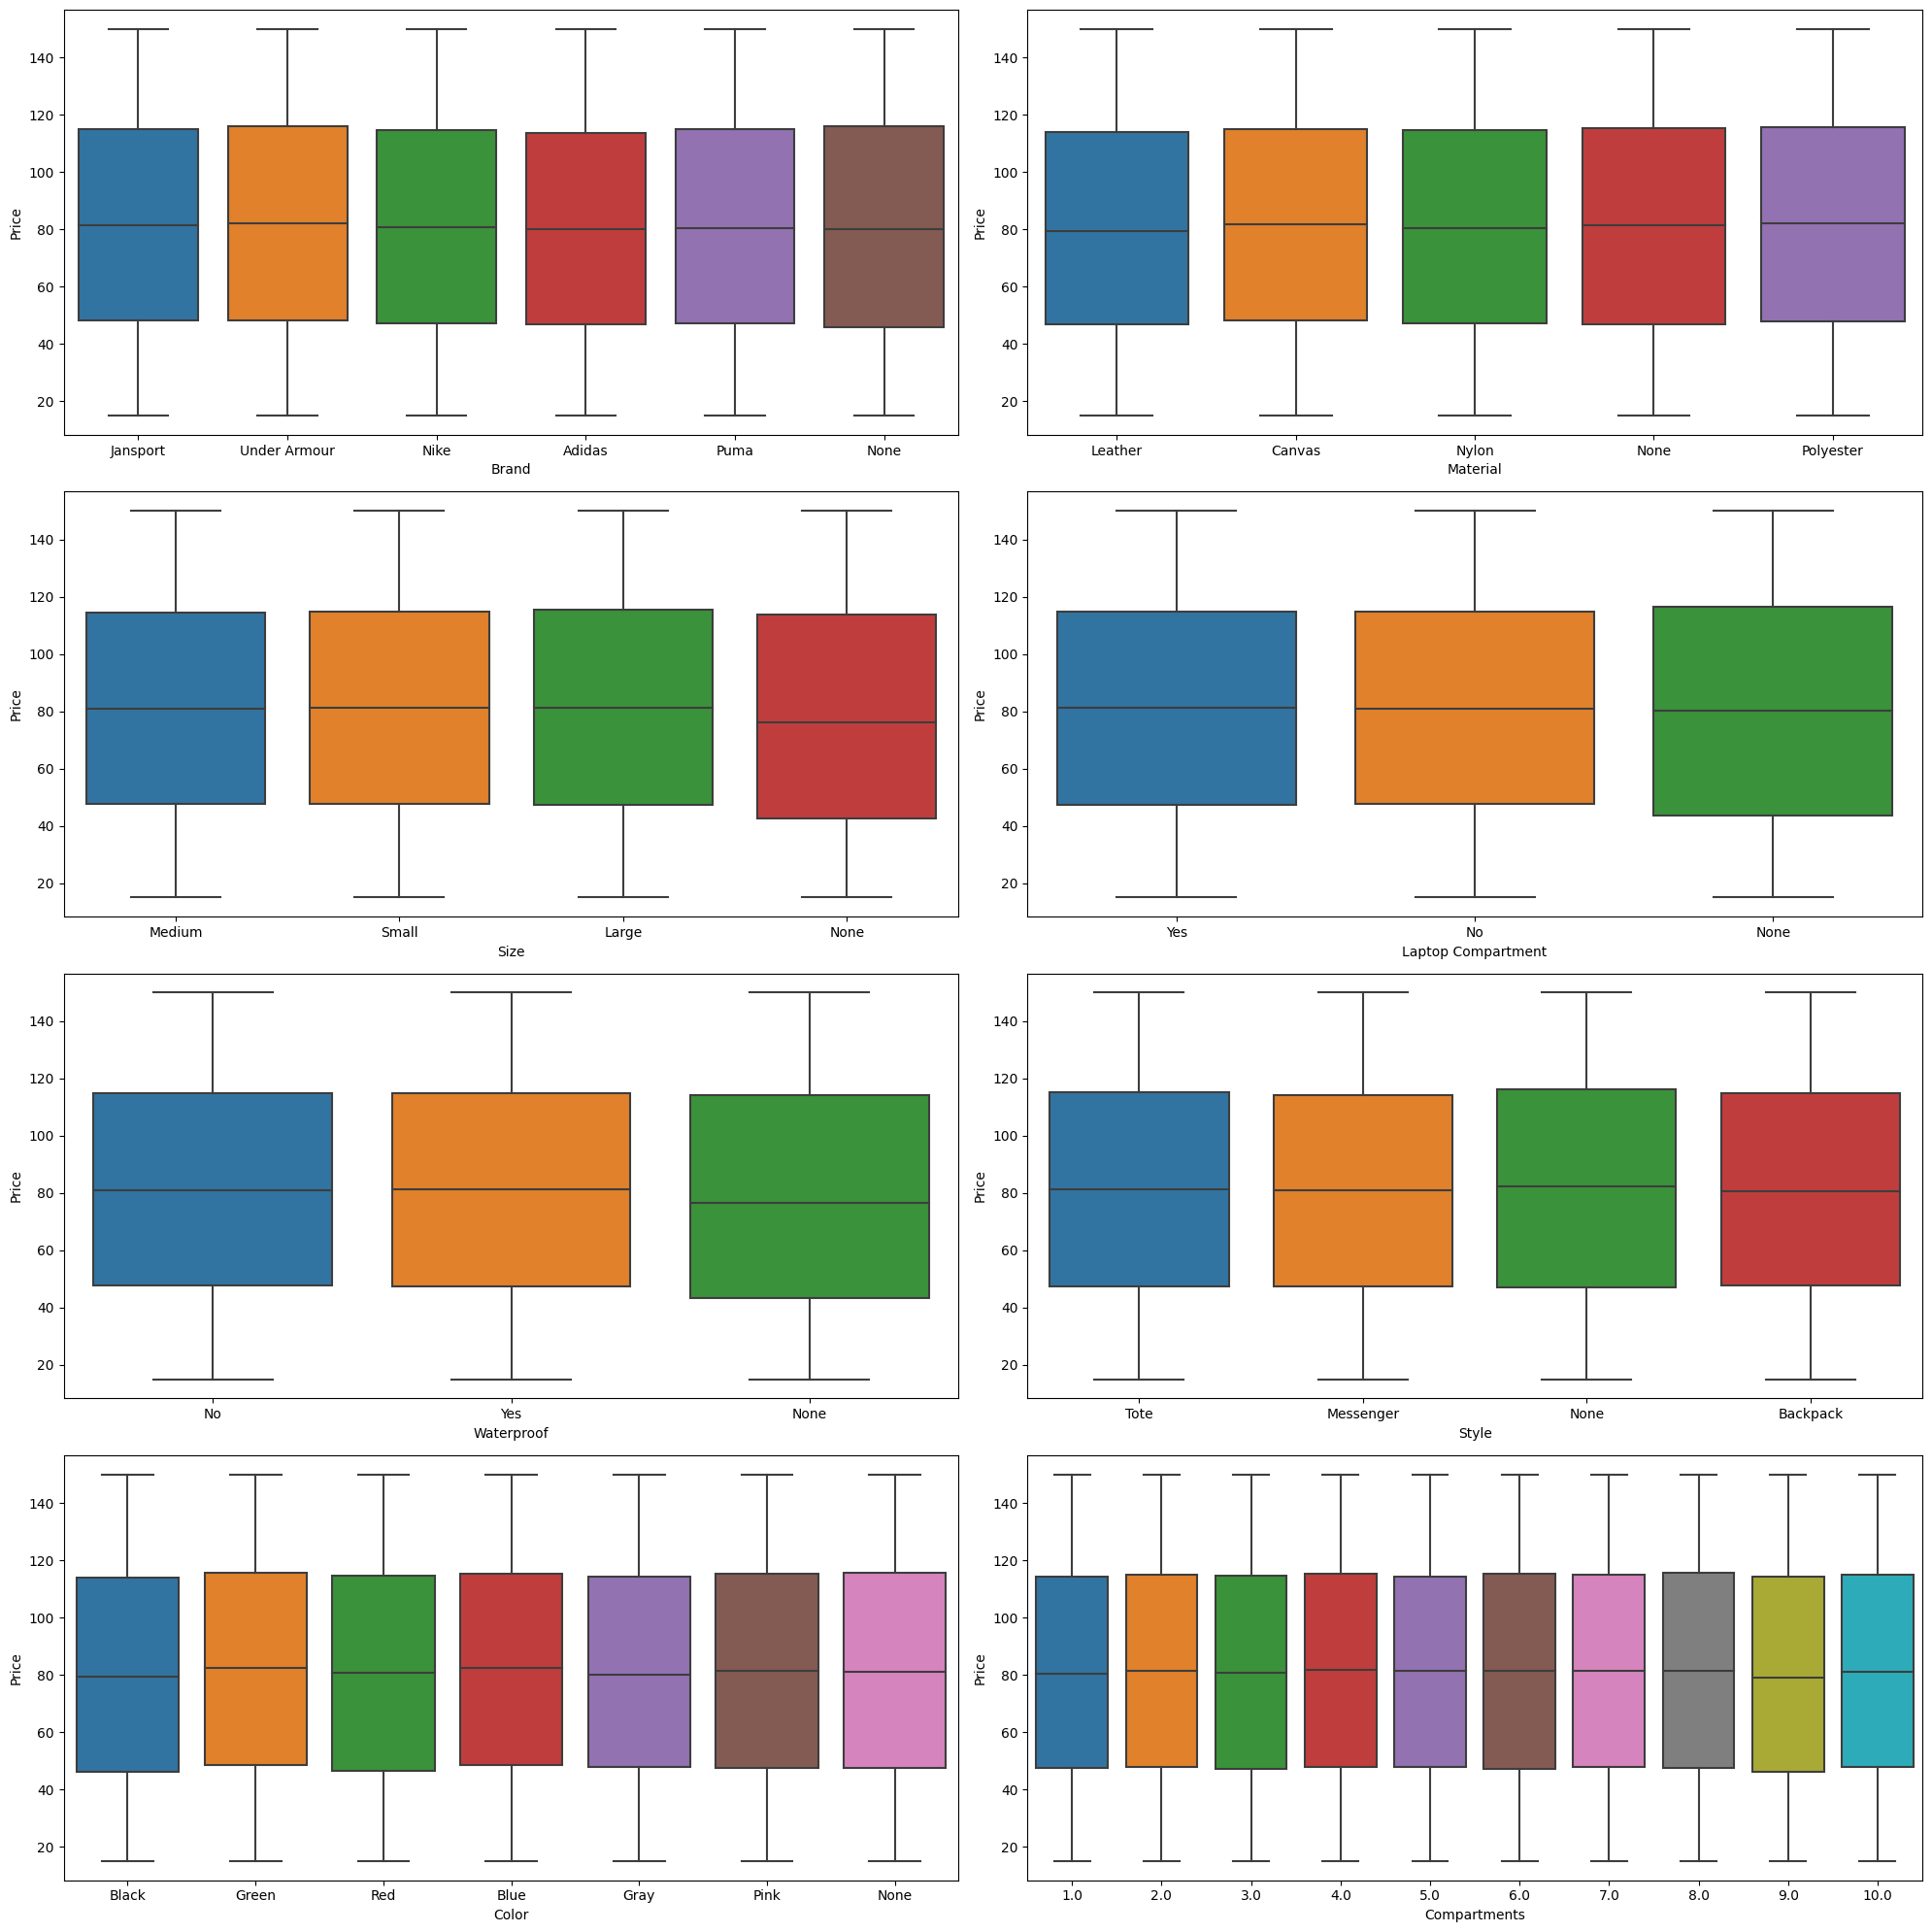

In [16]:
fig,ax=plt.subplots(4,2,figsize=(20,20))
ax=ax.flatten()
i=0
for col in df.columns[df.dtypes=='object']:
    sns.boxplot(data=df,y='Price',ax=ax[i],x=col)
    i+=1
sns.boxplot(data=df,y='Price',ax=ax[i],x='Compartments')
plt.tight_layout()
plt.show()

**The price distribution of backpacks is similar across brands, materials, sizes, and laptop compartment availability. This suggests that pricing is not significantly influenced by these categorical factors, and other aspects like design or brand reputation may play a bigger role.**

In [17]:
# Let us Target Encode our features
# importing
from cuml.preprocessing import TargetEncoder

In [18]:
en=TargetEncoder(n_folds=25, smooth=20, split_method='random', stat='mean')

for col in df.columns[df.dtypes == 'object']:  
    en.fit(train[col], train['Price'])
    df[col] = en.transform(df[col]) 
    te[col] = en.transform(te[col])

****
# Feature Engineering 
****

In [19]:
# importing
from sklearn.feature_selection import mutual_info_regression

In [20]:
# We will visualize the correlation and calculate the Mutual information
# Calculating Mutual Information
x=df.drop(columns='Price')
y=df['Price']
mi=mutual_info_regression(x,y)
mi_df=pd.DataFrame({'cols':x.columns,'mi':mi})
mi_df.sort_values(by='mi',inplace=True,ascending=False)

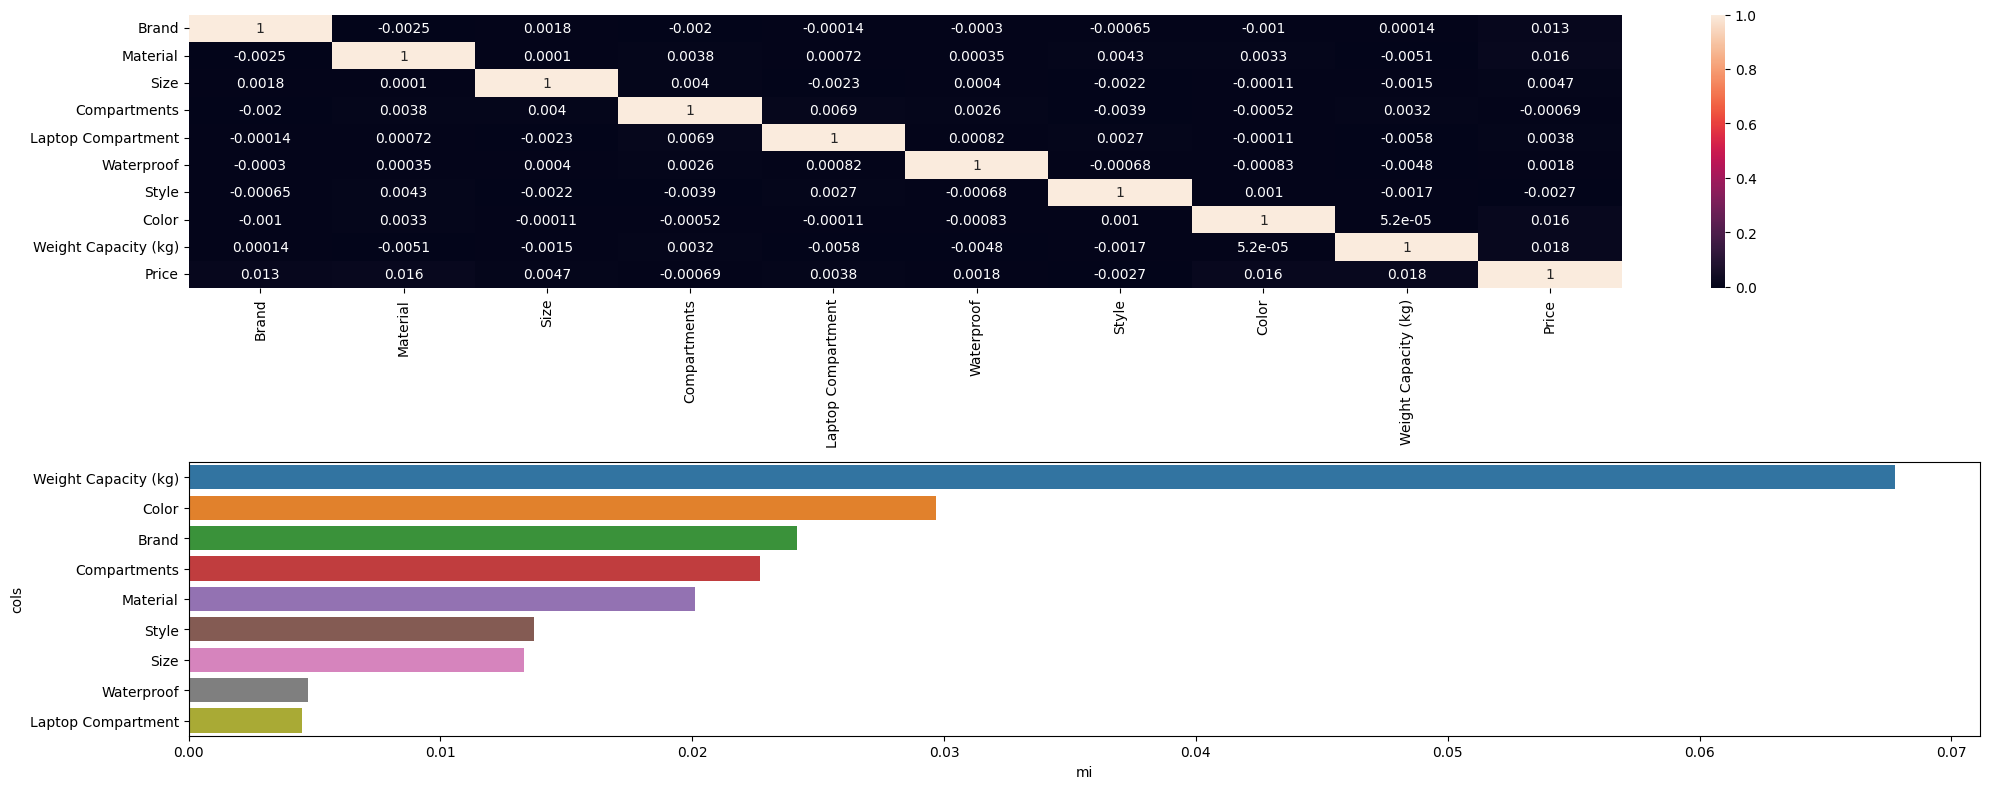

In [21]:
fig,ax=plt.subplots(2,1,figsize=(20,8))
sns.heatmap(df.corr(),annot=True,ax=ax[0])
sns.barplot(data=mi_df,x='mi',y='cols',ax=ax[1])
plt.tight_layout()
plt.show()

The below code is taken from @satya


def feature_engineering(df):

    df['Laptop_Compartment_Binary'] = df['Laptop Compartment'].map({'Yes': 1, 'No': 0})
    df['Waterproof_Binary'] = df['Waterproof'].map({'Yes': 1, 'No': 0})
    df['Style_Frequency_Encoding'] = df['Style'].map(df['Style'].value_counts(normalize=True))
    df['Color_Frequency_Encoding'] = df['Color'].map(df['Color'].value_counts(normalize=True))
    df['Size_Length'] = df['Size'].apply(lambda x: len(str(x)))
    df['Brand_Material_Interaction'] = df.groupby('Brand')['Material'].transform('nunique')
    df['Brand_Size_Interaction'] = df.groupby('Brand')['Size'].transform('nunique')
    df['Brand_Color_Interaction'] = df.groupby('Brand')['Color'].transform('nunique')
    df['Brand_Style_Interaction'] = df.groupby('Brand')['Style'].transform('nunique')
    df['Brand_Waterproof_Ratio'] = df.groupby('Brand')['Waterproof_Binary'].transform('mean')
    df['Material_Waterproof_Ratio'] = df.groupby('Material')['Waterproof_Binary'].transform('mean')
    df['Material_Laptop_Compartment_Ratio'] = df.groupby('Material')['Laptop_Compartment_Binary'].transform('mean')
    df['Brand_Weight_Capacity_Mean'] = df.groupby('Brand')['Weight Capacity (kg)'].transform('mean')
    df['Material_Weight_Capacity_Mean'] = df.groupby('Material')['Weight Capacity (kg)'].transform('mean')
    df['Size_Weight_Capacity_Mean'] = df.groupby('Size')['Weight Capacity (kg)'].transform('mean')
    df['Is_Lightweight'] = (df['Weight Capacity (kg)'] < df['Weight Capacity (kg)'].median()).astype(int)
    df['Is_Heavy_Duty'] = (df['Weight Capacity (kg)'] > df['Weight Capacity (kg)'].quantile(0.9)).astype(int)
    df['Is_Compact'] = df['Size'].isin(['Small', 'Extra Small']).astype(int)
    df['Is_Large'] = df['Size'].isin(['Large', 'Extra Large']).astype(int)
    df['Is_Unique_Style'] = df['Style'].map(df['Style'].value_counts()) <= df['Style'].value_counts().quantile(0.05)
    df['Material_Style_Interaction'] = df.groupby('Material')['Style'].transform('nunique')
    df['Brand_High_Capacity'] = (df['Brand_Weight_Capacity_Mean'] > df['Weight Capacity (kg)'].median()).astype(int)
    df['Size_High_Capacity'] = (df['Size_Weight_Capacity_Mean'] > df['Weight Capacity (kg)'].median()).astype(int)
    df['Brand_Low_Capacity'] = (df['Brand_Weight_Capacity_Mean'] < df['Weight Capacity (kg)'].median()).astype(int)
    df['Size_Low_Capacity'] = (df['Size_Weight_Capacity_Mean'] < df['Weight Capacity (kg)'].median()).astype(int)
    df['Brand_Waterproof_Trend'] = df['Brand_Waterproof_Ratio'] * df['Waterproof_Binary']
    df['Material_Waterproof_Trend'] = df['Material_Waterproof_Ratio'] * df['Waterproof_Binary']
    df['Style_Waterproof_Trend'] = df.groupby('Style')['Waterproof_Binary'].transform('mean')
    df['Brand_Compartment_Interaction'] = df.groupby('Brand')['Laptop_Compartment_Binary'].transform('mean')
    df['Material_Compartment_Interaction'] = df.groupby('Material')['Laptop_Compartment_Binary'].transform('mean')
    df['Size_Compartment_Interaction'] = df.groupby('Size')['Laptop_Compartment_Binary'].transform('mean')
    df['Brand_Style_Compartment'] = df.groupby(['Brand', 'Style'])['Laptop_Compartment_Binary'].transform('mean')
    df['Brand_Style_Waterproof'] = df.groupby(['Brand', 'Style'])['Waterproof_Binary'].transform('mean')
    df['Material_Style_Waterproof'] = df.groupby(['Material', 'Style'])['Waterproof_Binary'].transform('mean')
    df['Brand_Size_Waterproof'] = df.groupby(['Brand', 'Size'])['Waterproof_Binary'].transform('mean')
    df['Brand_Material_Waterproof'] = df.groupby(['Brand', 'Material'])['Waterproof_Binary'].transform('mean')
    df['Brand_Color_Waterproof'] = df.groupby(['Brand', 'Color'])['Waterproof_Binary'].transform('mean')
    df['Material_Color_Waterproof'] = df.groupby(['Material', 'Color'])['Waterproof_Binary'].transform('mean')
    df['Style_Color_Waterproof'] = df.groupby(['Style', 'Color'])['Waterproof_Binary'].transform('mean')
    df['Size_Color_Waterproof'] = df.groupby(['Size', 'Color'])['Waterproof_Binary'].transform('mean')
    df['Brand_Size_Compartment'] = df.groupby(['Brand', 'Size'])['Laptop_Compartment_Binary'].transform('mean')
    df['Material_Size_Compartment'] = df.groupby(['Material', 'Size'])['Laptop_Compartment_Binary'].transform('mean')
    df['Style_Size_Compartment'] = df.groupby(['Style', 'Size'])['Laptop_Compartment_Binary'].transform('mean')
    df['Brand_Compartment_Sum'] = df.groupby('Brand')['Laptop_Compartment_Binary'].transform('sum')
    df['Material_Compartment_Sum'] = df.groupby('Material')['Laptop_Compartment_Binary'].transform('sum')
    df['Size_Compartment_Sum'] = df.groupby('Size')['Laptop_Compartment_Binary'].transform('sum')
    df['Brand_Waterproof_Sum'] = df.groupby('Brand')['Waterproof_Binary'].transform('sum')
    df['Material_Waterproof_Sum'] = df.groupby('Material')['Waterproof_Binary'].transform('sum')
    df['Style_Waterproof_Sum'] = df.groupby('Style')['Waterproof_Binary'].transform('sum')
    df['Brand_Weight_Capacity_Sum'] = df.groupby('Brand')['Weight Capacity (kg)'].transform('sum')
    df['Material_Weight_Capacity_Sum'] = df.groupby('Material')['Weight Capacity (kg)'].transform('sum')
    df['Size_Weight_Capacity_Sum'] = df.groupby('Size')['Weight Capacity (kg)'].transform('sum')
    return df

df= feature_engineering(df)
te = feature_engineering(te)

We can use the above for feature engineering

I will not be using any for this notebook to understand how far we can get without it

****
# Data Preparation
****

In [22]:
# importing
from sklearn.model_selection import train_test_split

In [23]:
X=df.drop(columns='Price') 
y=df['Price']
# train and validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

****
# XGBoost
****

In [24]:
# importing
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV,KFold
from sklearn.metrics import mean_squared_error

In [25]:
if isinstance(X, pd.DataFrame):
    X = X.apply(pd.to_numeric, errors="coerce")  # Converts non-numeric to NaN
    X.fillna(0, inplace=True)
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

xgb_model = XGBRegressor(
    tree_method="hist",
    device="cuda",
    predictor="gpu_predictor",
    max_depth=5,
    n_estimators=1000,
    learning_rate=0.015,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=20,
    eval_metric="rmse"
)

kf = KFold(n_splits=3, shuffle=True, random_state=42)
cv_scores = []
for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    xgb_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = xgb_model.predict(X_val_fold)
    fold_rmse = mean_squared_error(y_val_fold, y_pred_fold, squared=False)
    cv_scores.append(fold_rmse)

mean_cv_rmse = np.mean(cv_scores)
print(f"Mean RMSE from 3-Fold CV: {mean_cv_rmse:.4f}")

xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    early_stopping_rounds=50,
    verbose=200
)

y_pred = xgb_model.predict(X_train)
rmse = mean_squared_error(y_train, y_pred, squared=False)
print(f"Final RMSE on Training Data: {rmse:.4f}")

param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.015, 0.02],
    "n_estimators": [500, 1000],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9]
}

random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_grid, n_iter=10,
    cv=3, scoring="neg_root_mean_squared_error", verbose=1, n_jobs=-1
)

random_search.fit(X_train, y_train)
print(f"Best Parameters: {random_search.best_params_}")


Mean RMSE from 3-Fold CV: 38.8851
[0]	validation_0-rmse:38.90820
[200]	validation_0-rmse:38.87223
[400]	validation_0-rmse:38.86394
[600]	validation_0-rmse:38.85971
[800]	validation_0-rmse:38.85706
[999]	validation_0-rmse:38.85528
Final RMSE on Training Data: 38.8732
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.015, 'colsample_bytree': 0.8}


****
# Prediction
****

In [26]:
pred= random_search.predict(te)
print("Predictions on X_te:", pred)

Predictions on X_te: [81.23297  82.50161  83.98316  ... 82.21194  81.899605 81.33338 ]


****
# Submission
****

In [27]:
final=pd.DataFrame({'id':tte['id'],'Price':pred})
final.to_csv('submission.csv',index=False)